In [1]:
import sys,os
sys.path.append('..')
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
from backtester.swarms.swarm import Swarm
from backtester.exoinfo import EXOInfo
from exobuilder.data.exostorage import EXOStorage
from IPython.core.display import display, HTML

from sklearn import linear_model, cross_validation, naive_bayes, ensemble, tree, neighbors, preprocessing

import pandas as pd
import numpy as np
import scipy
import pprint

import glob
from pandas.tseries.offsets import *

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

figsize(20,10)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Loading global setting for MongoDB etc.
from scripts.settings import *

try:
    from scripts.settings_local import *
except:
    pass

storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)
pp = pprint.PrettyPrinter(indent=4)

exo_list = storage.exo_list()
pp.pprint(exo_list)

[   'ES_BullishCollarBW',
    'ES_BearishCollarBW',
    'ES_CallSpread',
    'ES_PutSpread',
    'CL_BullishCollarBW',
    'CL_BearishCollarBW',
    'CL_CallSpread',
    'CL_PutSpread',
    'NG_BullishCollarBW',
    'NG_BearishCollarBW',
    'NG_CallSpread',
    'NG_PutSpread',
    'ES_ContFut',
    'NG_ContFut',
    'CL_ContFut',
    'ZC_BullishCollarBW',
    'ZC_BearishCollarBW',
    'ZC_CallSpread',
    'ZC_PutSpread',
    'ZC_ContFut',
    'ZN_BullishCollarBW',
    'ZN_BearishCollarBW',
    'ZN_CallSpread',
    'ZN_PutSpread',
    'ZN_ContFut']


In [18]:
exo_series, exo_dict = storage.load_series('CL_PutSpread')
#exo_series, exo_dict = storage.load_series('ZN_ContFut')
exo_series = exo_series[exo_series.columns[0]]

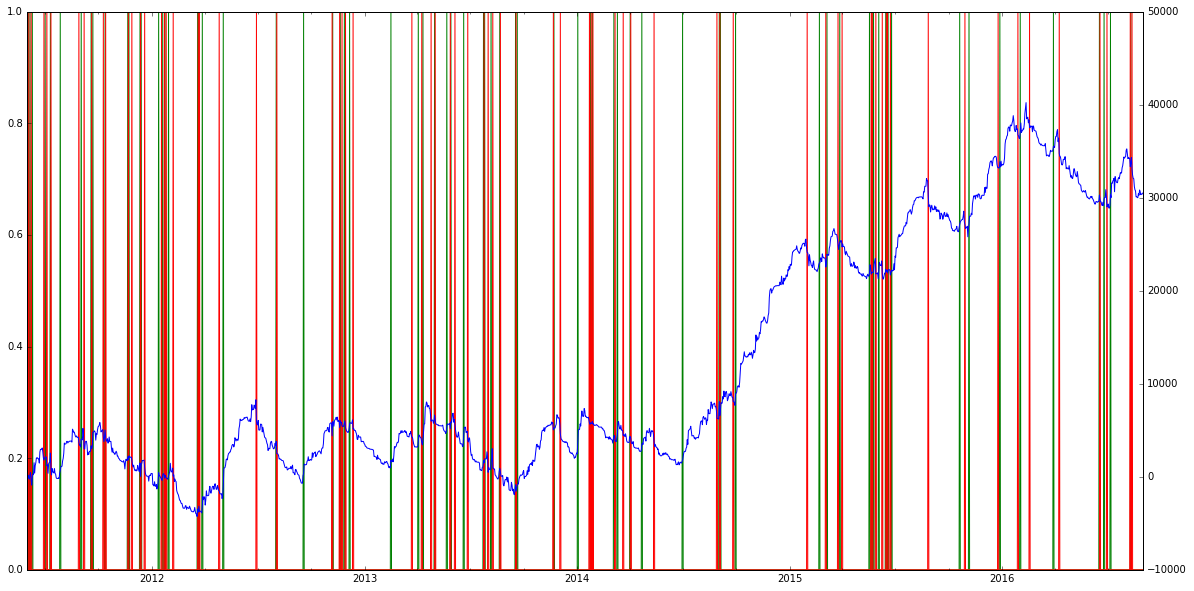

In [19]:
ema = exo_series.ewm(10).mean()

exo_series.plot(secondary_y=True)
#ema.plot()
CrossUp(exo_series, ema).plot()
CrossDown(exo_series, ema).plot()
#exo_series.pct_change().rolling(100).skew().plot()

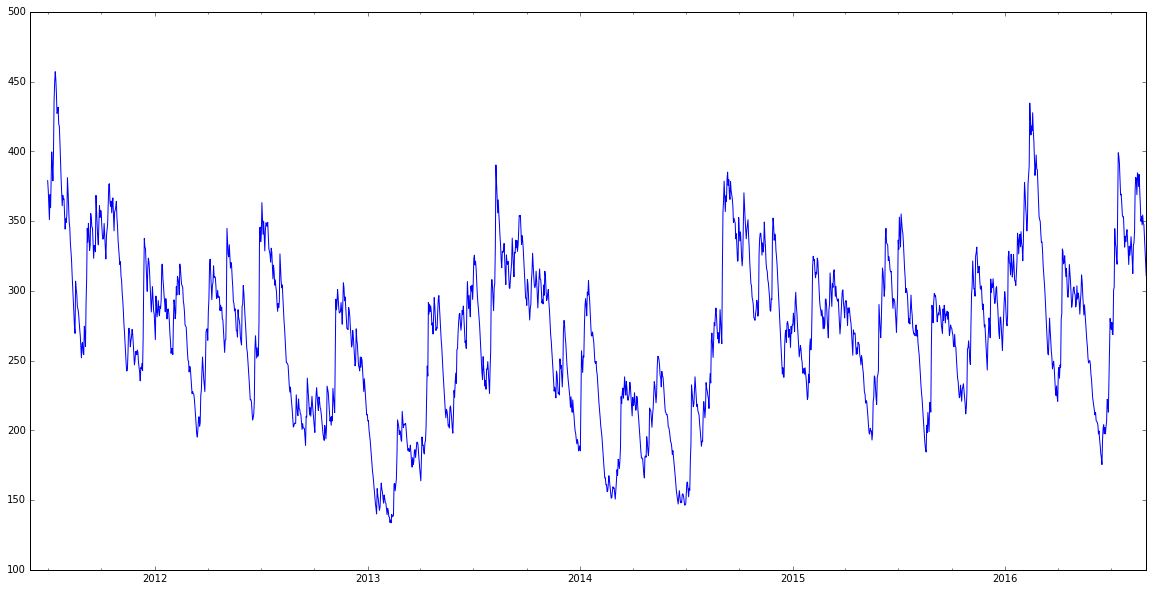

In [20]:
O = L = H = C = exo_series
period = 30

atr = ATR(H, L, C, period)
atr.plot()

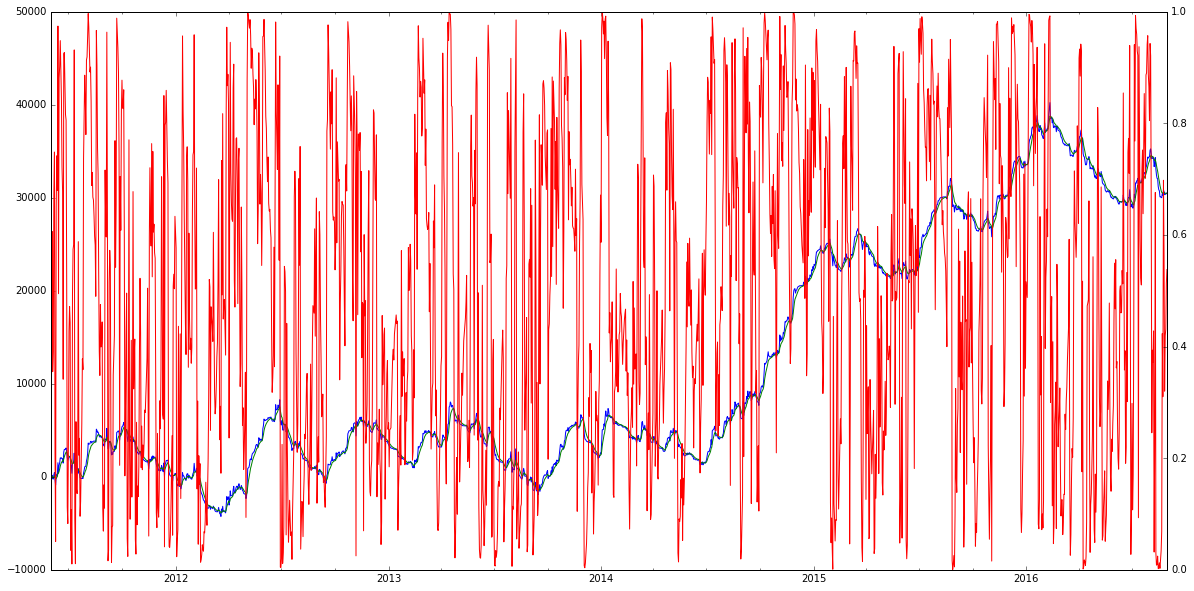

In [23]:
ema = exo_series.ewm(3).mean()

exo_series.plot()
ema.plot()

(exo_series - ema).rank(pct=True).plot(secondary_y=True)
axhline(0)